<a href="https://colab.research.google.com/github/isaacchunn/SC1015_MiniPrj_Airbnb/blob/main/Airbnb_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset : Airbnb Singapore Dataset from InsideAirbnb
#### Question : If we were an AirBnb host, how can we maximise our profit?


Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/


# Contents
  1. Linear Regression
  2. Regression 2
  3. Regression 3

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1802]:
# Isaac Chun Jun Heng U2221389B
# J'sen Ong Jia Xuan  U2220457J
# Tang Teck Meng U2221809C

In [1803]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #We only need pyplot
sb.set() #Set the default Seaborn style for graphics

### Additional Libraries

Import additional libraries

> sklearn : Conduct linear regression analysis

In [1804]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### General Utility Functions

In [1805]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

In [1806]:
def removeOutliers(df, colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3-q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  result = df.loc[(df[colName] >= low) & (df[colName] <= high)]
  return result

In [1807]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [1808]:
#Define a regression func to easily calculate regression among two variables
def calcLinRegression(predictor, response, testSize = 0.2, solidLine = False, f_size = (20,10), xTitle = None, yTitle = None):

    #Get the appropriate data from train and put them in DF!
    #Check if the inputs are valid
    if (predictor is None or response is None):
        print("Invalid input into regression function")
        return
     
    #Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)

    #Then calculate the linear regression using train data
    linreg = LinearRegression();
    linreg.fit(X_train, y_train);

    #Print Coefficients of the Linear Regression line
    print("Regression intercept \t\t: b = ", linreg.intercept_)
    print("Regression coefficients \t: a = ",linreg.coef_)

    #Predict the values corresponding to the predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    #Print the mean squared and root mean squared error on the train data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Train)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    mseTrain =  mean_squared_error(X_train, y_train_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Print the mean squared and root mean squared error on the test data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Test)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    mseTrain =  mean_squared_error(X_test, y_test_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Plot the regression line
    f = plt.figure(figsize = f_size)
    plt.scatter(X_train, y_train)
    if xTitle:
      plt.xlabel(xTitle)
    if yTitle:
      plt.ylabel(yTitle)
    if solidLine:
        plt.plot(X_train,y_train_pred,'r-', linewidth = 2)
    else:
        plt.scatter(X_train, y_train_pred, color = "r")
    print()

    #Then return a tuple of the predictions
    return (y_test, y_train_pred, y_test_pred)

In [1809]:
def calcLinRegressionCategorical(response, predictor, testSize = 0.2):
  # Split the Dataset into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(response, predictor, test_size = testSize)

  # fit model
  linreg = LinearRegression()
  linreg.fit(X_train, y_train)

  # predict
  y_train_pred = linreg.predict(X_train)

  # Goodness of Fit for Train Data
  print("Goodness of Fit of Model \tTrain Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
  print("Mean Squared Error (MSE) \t:",
        mean_squared_error(y_train, y_train_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print()

  # Accuracy for Test Data
  y_test_pred = linreg.predict(X_test)
  print("Accuracy of Model        \tTest Dataset")
  print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
  print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
  print("Root Mean Squared Error (RMSE) \t:",
        np.sqrt(mean_squared_error(y_test, y_test_pred)))
  print()
  return y_train, y_train_pred, y_test, y_test_pred

### Mount Google Drive (unused, uncomment if need add anything from google drive.)

In [1810]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

---

>## Hypothesis  

1. The number of amenities a listing provides will affect its price, the more the amenities, the higher the listing price
2. Variables related to a listing's review will have positive correlation to listing's price

---

>## Import the Dataset  

We have imported the cleaned dataset based on our EDA done in the other files.

In [1811]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/listings_cleaned.csv"
airDF = pd.read_csv(url)
airDF.head()

,name,listing_url,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,Ensuite Room (Room 1 & 2) near EXPO,https://www.airbnb.com/rooms/71609,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,...,20.0,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,B&B Room 1 near Airport & EXPO,https://www.airbnb.com/rooms/71896,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,...,24.0,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,Room 2-near Airport & EXPO,https://www.airbnb.com/rooms/71903,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,...,47.0,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Amazing Room with window 10min to Redhill,https://www.airbnb.com/rooms/275343,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,...,22.0,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,15 mins to Outram MRT Single Room,https://www.airbnb.com/rooms/275344,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,...,14.0,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


In [1812]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3035 non-null   object 
 1   listing_url                   3035 non-null   object 
 2   description                   2968 non-null   object 
 3   neighborhood_overview         1968 non-null   object 
 4   host_response_time            2405 non-null   object 
 5   host_response_rate            2405 non-null   object 
 6   host_acceptance_rate          2284 non-null   object 
 7   neighbourhood_cleansed        3018 non-null   object 
 8   neighbourhood_group_cleansed  3018 non-null   object 
 9   latitude                      3018 non-null   float64
 10  longitude                     3018 non-null   float64
 11  property_type                 3018 non-null   object 
 12  accommodates                  3018 non-null   float64
 13  ame

In [1813]:
print(airDF.dtypes)

name                             object
listing_url                      object
description                      object
neighborhood_overview            object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
accommodates                    float64
amenities                        object
price                            object
minimum_nights                  float64
maximum_nights                  float64
number_of_reviews               float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64


---

>## Cleaning our DataFrame/Dataset

### 1. Drop properties with N/A or 0% acceptance rate as these properties do not get stayed at by visitors.

In [1814]:
#Drop all the properties that has no host acceptance rate then drop
airDF = airDF.dropna(subset=["host_acceptance_rate"])
#Then remove all the 0% acceptance rate
airDF = airDF[airDF["host_acceptance_rate"] != 0]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF.head(n=5)

,name,listing_url,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,Ensuite Room (Room 1 & 2) near EXPO,https://www.airbnb.com/rooms/71609,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,...,20.0,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,B&B Room 1 near Airport & EXPO,https://www.airbnb.com/rooms/71896,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,...,24.0,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,Room 2-near Airport & EXPO,https://www.airbnb.com/rooms/71903,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,...,47.0,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Amazing Room with window 10min to Redhill,https://www.airbnb.com/rooms/275343,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,...,22.0,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,15 mins to Outram MRT Single Room,https://www.airbnb.com/rooms/275344,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,...,14.0,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


### 2. Clean the price column using code as it has "$", "," and "." 


In [1815]:
airDF["price"]

0       $46,437.00 
1           $81.00 
2           $81.00 
3           $52.00 
4           $49.00 
           ...     
2279        $45.00 
2280        $45.00 
2281       $186.00 
2282       $797.00 
2283       $434.00 
Name: price, Length: 2284, dtype: object

In [1816]:
breaks = [",", "$"]
for i in range(len(airDF["price"])):
    s = airDF.loc[:,("price")][i]
    for x in breaks:
        s = s.replace(x,"")
    s = "".join(s.split(".")[:-1])
    airDF.loc[:,("price")][i] = int(s)
airDF = airDF.astype({'price': 'int32'})

<ipython-input-1816-e0f04e7ead66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF.loc[:,("price")][i] = int(s)


We also remove any outliers as it is unrealistic for a property to have above > $45,000 per night

In [1817]:
airDF = airDF[airDF.price < 1000]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF["price"]

0        81
1        81
2        52
3        49
4       175
       ... 
2226     45
2227     45
2228    186
2229    797
2230    434
Name: price, Length: 2231, dtype: int32

In [1818]:
airDF["property_type"]

0              Private room in home
1              Private room in home
2       Private room in rental unit
3       Private room in rental unit
4              Private room in home
                   ...             
2226          Shared room in hostel
2227      Shared room in guesthouse
2228         Private room in hostel
2229                  Room in hotel
2230                  Room in hotel
Name: property_type, Length: 2231, dtype: object

In [1819]:
#Classify according to their first word up to the space
count = 0
for x in airDF["property_type"]:
    #Split this
    s = airDF["property_type"].iloc[count].split(" ", 1)[0]
    if s == "Private":
      s = "Private room"
    elif s == "Entire":
      s = "Entire home/apt"
    elif s == "Room":
      s= "Hotel/Hostel"
    elif s == "Shared":
      s= "Shared room"
    airDF["property_type"].iloc[count] = s
    count += 1
#we print out the values to check if its cleaned properly
airDF["property_type"]

<ipython-input-1819-95909aa8827a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["property_type"].iloc[count] = s


0       Private room
1       Private room
2       Private room
3       Private room
4       Private room
            ...     
2226     Shared room
2227     Shared room
2228    Private room
2229    Hotel/Hostel
2230    Hotel/Hostel
Name: property_type, Length: 2231, dtype: object

### 3. Convert the amenities column to a list, and add a new column with the number of amenities to be used for our prediction.

In [1820]:
airDF["amenities"]

0       ["Cooking basics", "Refrigerator", "Kitchen", ...
1       ["Cooking basics", "Heating", "Kitchen", "Hair...
2       ["Air conditioning", "Shampoo", "Smoke alarm",...
3       ["Air conditioning", "Shampoo", "Smoke alarm",...
4       ["Cooking basics", "Kitchen", "Private entranc...
                              ...                        
2226    ["Air conditioning", "Fire extinguisher", "Sec...
2227    ["Air conditioning", "Fire extinguisher", "Sec...
2228    ["Air conditioning", "Fire extinguisher", "Sec...
2229    ["First aid kit", "EV charger", "Heating", "Re...
2230    ["Air conditioning", "Fire extinguisher", "Fir...
Name: amenities, Length: 2231, dtype: object

In [1821]:
#Add a new column of amenities
airDF["no_amenities"] = 0
#Replace all with the integer variant
count = 0
for x in airDF["amenities"]:   
    #Convert string into list
    #Convert string into list
    x = x.replace('[',"")
    x = x.replace(']',"")
    x = x.replace('"', "")
    x = x.replace(", ", ",")
    x = x.split(",")
    airDF["amenities"][count] = x
    airDF["no_amenities"][count] = len(x)
    count += 1

<ipython-input-1821-a56617251945>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = x
<ipython-input-1821-a56617251945>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(x)


In [1822]:
airDF["amenities"].head(n=5)

0    [Cooking basics, Refrigerator, Kitchen, Hair d...
1    [Cooking basics, Heating, Kitchen, Hair dryer,...
2    [Air conditioning, Shampoo, Smoke alarm, Long ...
3    [Air conditioning, Shampoo, Smoke alarm, Long ...
4    [Cooking basics, Kitchen, Private entrance, Ha...
Name: amenities, dtype: object

In [1823]:
airDF["no_amenities"].head(n=5)

0    31
1    26
2    17
3    18
4    32
Name: no_amenities, dtype: int64

In [1824]:
#Want to visualize the total count of amenities so we can form a generalization such that our number of amenities remains reliable.
amenityCount = {}
for x in airDF["amenities"]:
    for item in x:
        if item in amenityCount:
            amenityCount[item] += 1
        else:
            amenityCount[item] = 1
        
#Add it to a DF
amenityCountDF = pd.DataFrame(columns = ["amenity", "count"])
count = 0
for keys, values in amenityCount.items():
    amenityCountDF.loc[count] = [keys, values]
    count += 1

#Sort the DF
amenityCountDF = amenityCountDF.sort_values(by="count", ascending = False)
amenityCountDF.head(n=15)

,amenity,count
9,Long term stays allowed,2218
7,Wifi,2167
32,Air conditioning,2061
17,Essentials,1913
2,Kitchen,1800
43,Hangers,1770
39,Iron,1707
30,Washer,1678
26,Hot water,1588
3,Hair dryer,1516


In [1825]:
amenityCountDF.tail(n=10)

,amenity,count
160,Essential shampoo,1
278,24-hour fitness center,1
285,Toiletries,1
279,Kitchenette,1
280,Free wifi,1
281,Complimentary self parking,1
282,Limited housekeeping \u2014 weekly,1
283,Laundry services,1
284,Bed sheets and pillows,1
388,Coffee maker: french press,1


We have decided to only use those amenities that are very prominent in most of the listings as the number of amenities should be consistent, and not be filled with many values that do not matter. For example, we do not know what Fire TV is.

In [1826]:
#Changeable cutoff that are determined by us to check for robustness of our model
amenityCutOff = 30

In [1827]:
uselessAmenityList = amenityCountDF[amenityCountDF["count"] <= amenityCutOff]["amenity"].values.tolist()

In [1828]:
#Remove all values in our df that correspond to our useless amenity list
count = 0
for x in airDF["amenities"]:
    l = [i for i in x if i not in uselessAmenityList]
    airDF["amenities"][count] = l
    airDF["no_amenities"][count] = len(l)
    count +=1

<ipython-input-1828-ae78827c68ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = l
<ipython-input-1828-ae78827c68ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(l)


### 4. Fill in na values in host_response_time to be a value as we are using it to gather insights

In [1829]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 95


In [1830]:
airDF["host_response_time"].value_counts()

within an hour        827
within a few hours    725
within a day          472
a few days or more    112
Name: host_response_time, dtype: int64

In [1831]:
#Fill it to be the worst scenario to achieve better distribution
airDF = airDF.fillna(value = {"host_response_time": "a few days or more"})
None

In [1832]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 0


In [1833]:
airDF["host_response_time"].value_counts()

within an hour        827
within a few hours    725
within a day          472
a few days or more    207
Name: host_response_time, dtype: int64

---

>## Splitting the Dataset

In [1834]:
#Split the dataset into train and test in 80:20 ratio
train_data, test_data = train_test_split(airDF, test_size = 0.2, random_state = 55)

#Print out what we have in our test and train data
print("Train Data :")
print("Data type : ", type(train_data))
print("Data dim : ", train_data.shape)
print("---------------------------------------")
print("Test Data :")
print("Data type : ", type(test_data))
print("Data dim : ", test_data.shape)
print("---------------------------------------")

Train Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (1784, 28)
---------------------------------------
Test Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (447, 28)
---------------------------------------


---

>## 1. Linear Regression 

In [1835]:
priceDF = airDF["price"]
priceDF.head(n=5)

0     81
1     81
2     52
3     49
4    175
Name: price, dtype: int32

---
##One - hot encoding all the potential categorical variables !


In [1836]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#we will exclude amenities since that feature requires individual data cleaning
potentialFeaturesDF = pd.DataFrame(airDF[["host_response_time","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type", "accommodates", "number_of_reviews", "no_amenities"]])

#pull out all the categorical variables into airbnb_cat DF
cat_variables = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type']
airbnb_cat = potentialFeaturesDF[cat_variables]

#OHE airbnb_cat categorical predictors
ohe.fit(airbnb_cat)
airbnb_cat_ohe = pd.DataFrame(ohe.transform(airbnb_cat).toarray(),
                             columns=ohe.get_feature_names_out(airbnb_cat.columns))

airbnb_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   host_response_time_a few days or more           2231 non-null   float64
 1   host_response_time_within a day                 2231 non-null   float64
 2   host_response_time_within a few hours           2231 non-null   float64
 3   host_response_time_within an hour               2231 non-null   float64
 4   neighbourhood_cleansed_Ang Mo Kio               2231 non-null   float64
 5   neighbourhood_cleansed_Bedok                    2231 non-null   float64
 6   neighbourhood_cleansed_Bishan                   2231 non-null   float64
 7   neighbourhood_cleansed_Bukit Batok              2231 non-null   float64
 8   neighbourhood_cleansed_Bukit Merah              2231 non-null   float64
 9   neighbourhood_cleansed_Bukit Panjang     

In [1837]:
num_variable = []
for i in potentialFeaturesDF:
    if i not in cat_variables:
        num_variable.append(i)
num_variable

['accommodates', 'number_of_reviews', 'no_amenities']

In [1838]:
# Combining Numeric features with the OHE Categorical features
airbnb_num = potentialFeaturesDF[num_variable]
airbnbData_ohe = pd.concat([airbnb_num , airbnb_cat_ohe],sort=False,axis=1).reindex(index=airbnb_num.index)

# Check the final dataframe
airbnbData_ohe

,accommodates,number_of_reviews,no_amenities,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,...,neighbourhood_cleansed_Yishun,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,property_type_Entire home/apt,property_type_Hotel/Hostel,property_type_Private room,property_type_Shared room
0,1.0,24.0,28,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,47.0,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,22.0,17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,14.0,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,12.0,31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,1.0,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2227,1.0,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2228,4.0,0.0,8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2229,3.0,0.0,39,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---


In [1839]:
def plot_actual_vs_pred(y, y_pred, title=None):
    plot_df = pd.concat([pd.DataFrame(y, columns=['price']), pd.DataFrame(y_pred, columns=['price_pred'])], axis=1, join='inner')
    plot_df.sort_values(by=['price'], inplace=True)
    plot_df.reset_index(inplace=True, drop=True)
    ax = sb.lineplot(data=plot_df)
    if title:
        ax.set_title(title)

---
##1a) All features vs price

In [1840]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe.drop(num_variable, axis=1))
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38431888759147903
Mean Squared Error (MSE) 	: 24766.344030269058
Root Mean Squared Error (RMSE) 	: 157.37326339079667

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.35507811064242856
Mean Squared Error (MSE) 	: 31814.14639261745
Root Mean Squared Error (RMSE) 	: 178.36520510631397



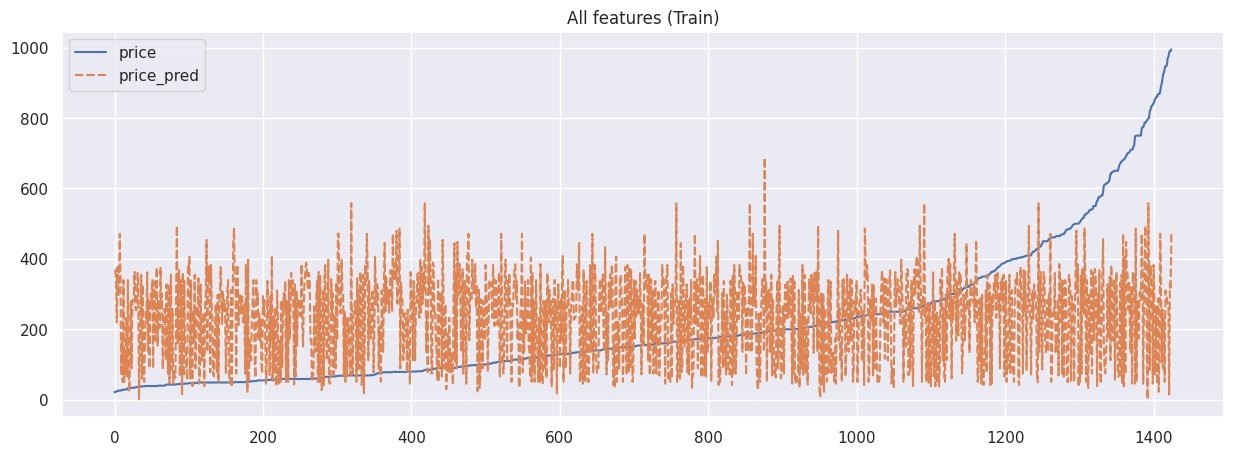

In [1841]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title='All features (Train)')

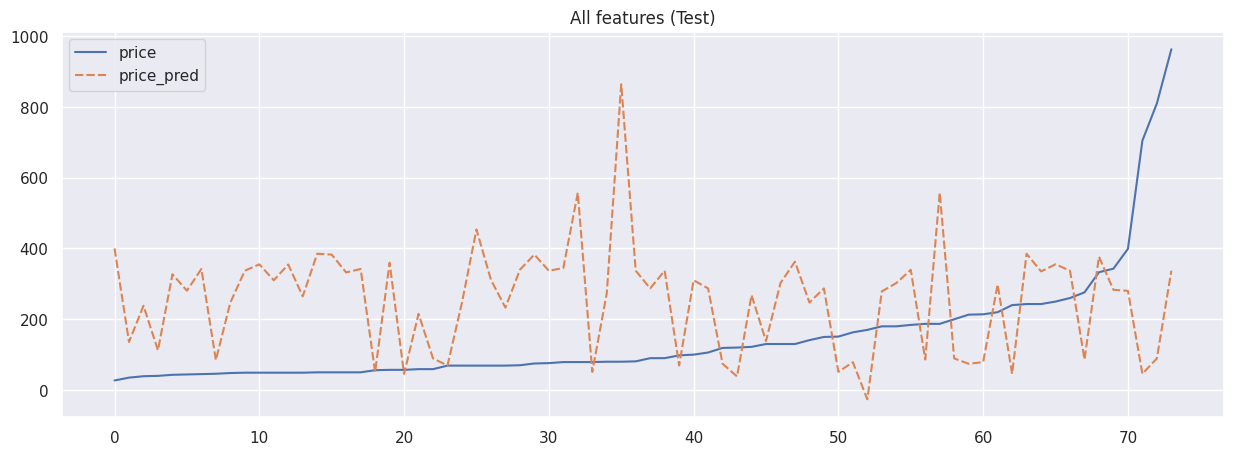

In [1842]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title='All features (Test)')

## 1a) All features vs price Analysis


*   Eventhough the explained variance is relatively low, we can see that explained variance for both train and test models are relatively similar, this suggest that the model is able to predict at a moderate performance.
*   The test graph shows that there is extreme predictions for certain features.



---
## 1b) host_response_time vs price 

In [1843]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'host_response_time' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.009810211872210095
Mean Squared Error (MSE) 	: 41502.540888628086
Root Mean Squared Error (RMSE) 	: 203.72172414504075

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.027743855829201025
Mean Squared Error (MSE) 	: 41421.708907910375
Root Mean Squared Error (RMSE) 	: 203.5232392330428



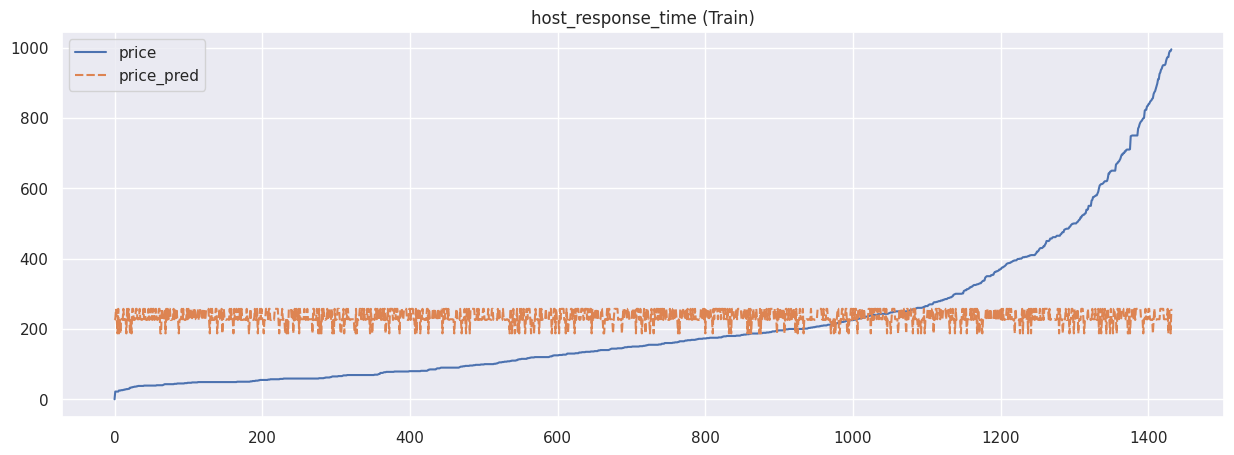

In [1844]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="host_response_time (Train)")

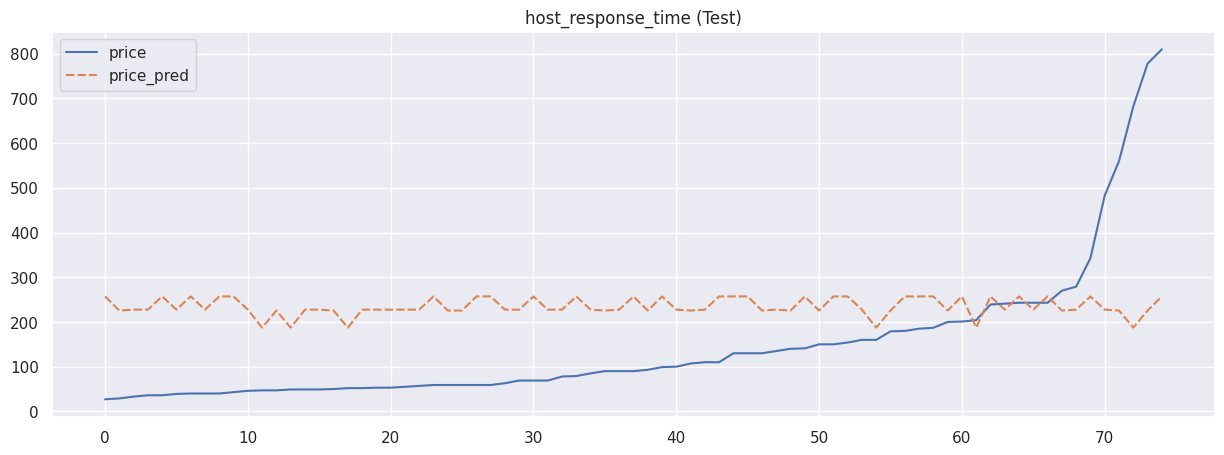

In [1845]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="host_response_time (Test)")


## 1b) host_response_time vs price Analysis



*   Explained variance of 0 suggests that the model is not able to explain any of the variability in the response. 
*   We will explore other variables



---
## 1c) neighbourhood_cleansed vs price

In [1846]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_cleansed' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22827979360234285
Mean Squared Error (MSE) 	: 31368.892516816144
Root Mean Squared Error (RMSE) 	: 177.11265487484553

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.19292638358896108
Mean Squared Error (MSE) 	: 38252.51552013423
Root Mean Squared Error (RMSE) 	: 195.58250310325366



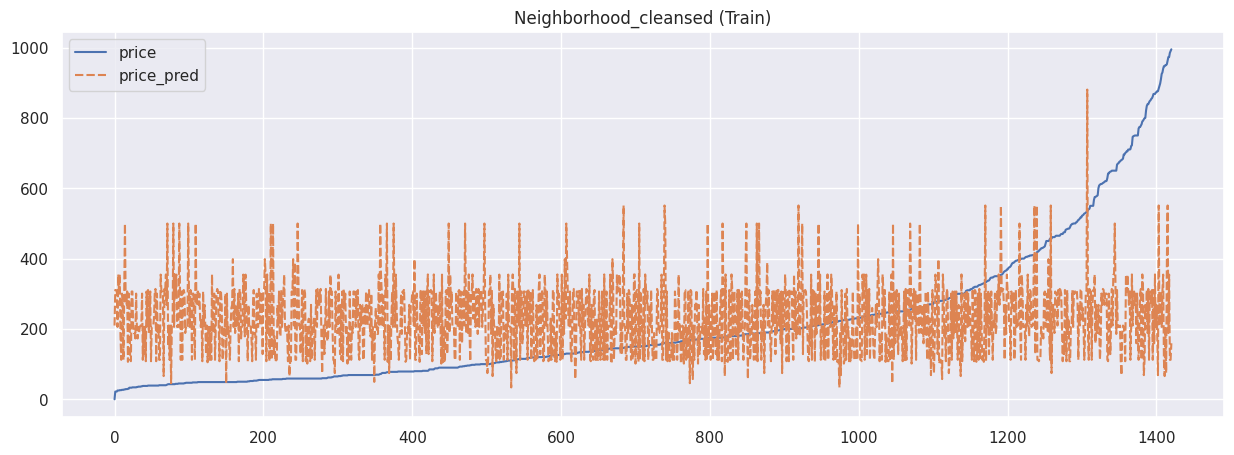

In [1847]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="Neighborhood_cleansed (Train)")

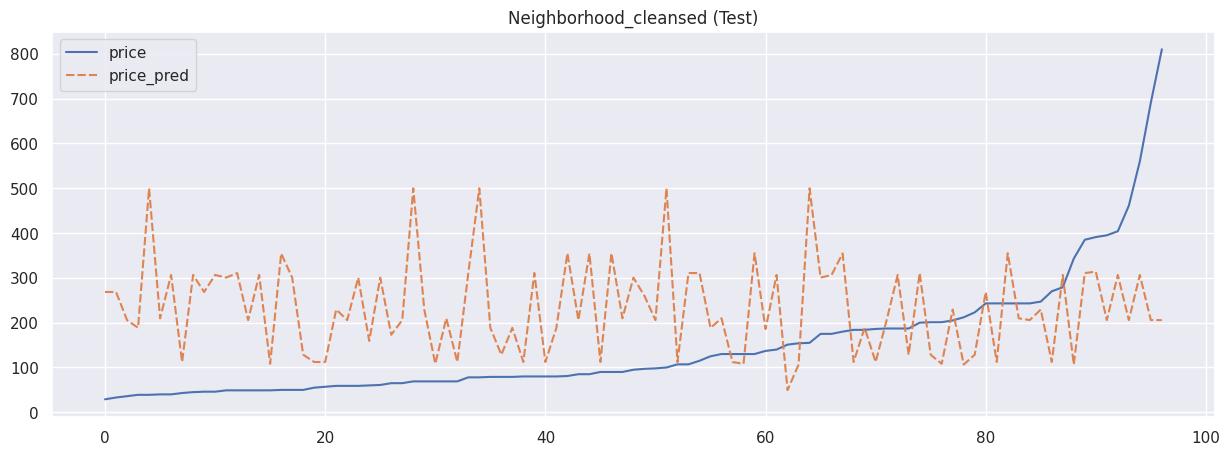

In [1848]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="Neighborhood_cleansed (Test)")

## 1c) neightbourhood_cleansed vs price Analysis


1.   with both models having an explained variance of 0.2 signifies that just using neighbourhood is not good enough for our problem statement
2.   We will explore other variables



---
## 1d) neighbourhood_group_cleansed vs price

In [1849]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'neighbourhood_group_cleansed_' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.014082408832663762
Mean Squared Error (MSE) 	: 40467.86799327354
Root Mean Squared Error (RMSE) 	: 201.1662695216908

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.0029751281601524404
Mean Squared Error (MSE) 	: 45865.474832214764
Root Mean Squared Error (RMSE) 	: 214.1622628574296



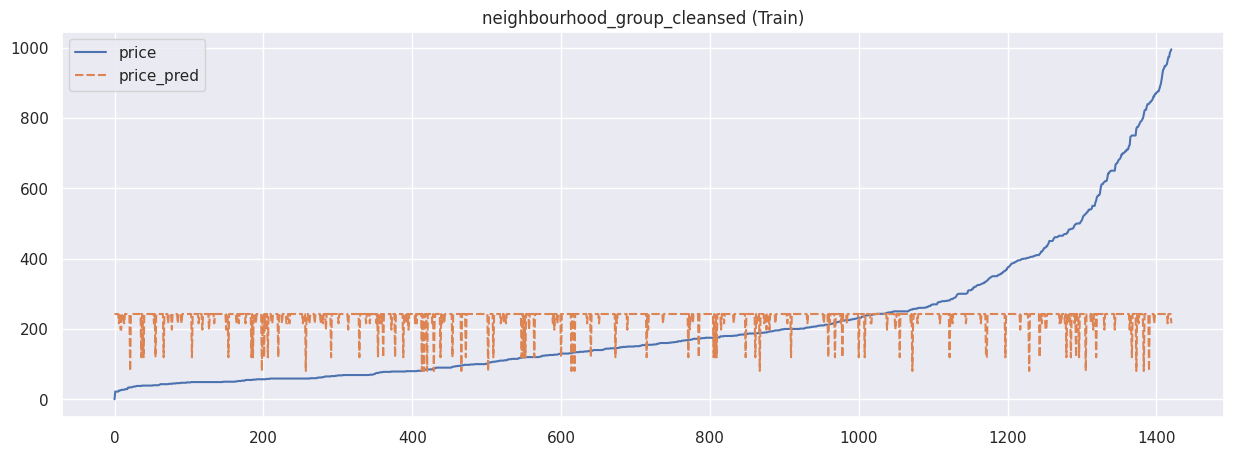

In [1850]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="neighbourhood_group_cleansed (Train)")

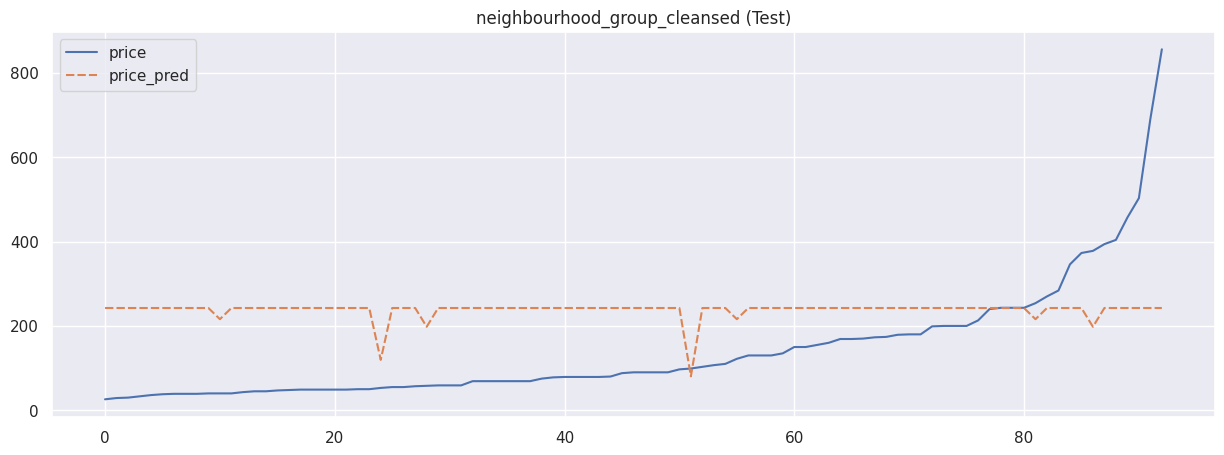

In [1851]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="neighbourhood_group_cleansed (Test)")

## 1d) neighbour_group_cleansed vs price Analysis


*   With explained variance of less than 0 signifies this feature is not able to explain any of the variability
*   We will explore other variables



---
##1e) property_type vs price 

In [1852]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(airbnbData_ohe[[col for col in airbnbData_ohe if 'property_type' in col]])
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2873592471358313
Mean Squared Error (MSE) 	: 29331.095869534754
Root Mean Squared Error (RMSE) 	: 171.26323560395195

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.2859626089754672
Mean Squared Error (MSE) 	: 32489.377438129195
Root Mean Squared Error (RMSE) 	: 180.24809967966152



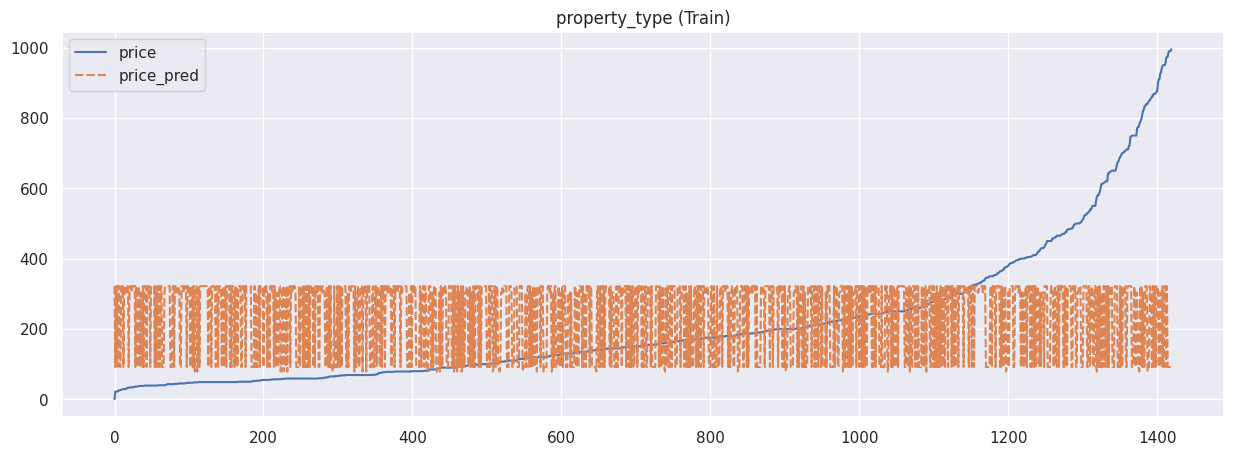

In [1853]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="property_type (Train)")

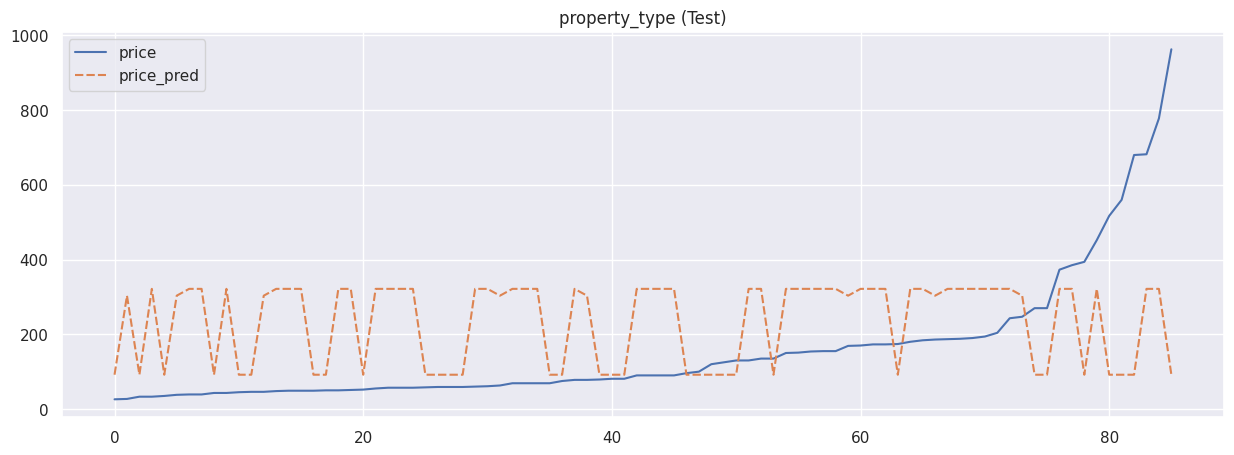

In [1854]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="property_type (Test)")

## 1e) property_type vs price Analysis


1.   with a explained variance of 0.28 for train signifies property_type is not a good predictor 
2.   We will explore other variables




---
## 1f) accommodates vs price 

Regression intercept 		: b =  99.54183333827177
Regression coefficients 	: a =  [51.46646024]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.19794219996509066
Mean Squared Error (MSE)	: 61763.157597123725
Root Mean Squared Error (RMSE) 	: 248.52194590644046
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.19114830038703878
Mean Squared Error (MSE)	: 66130.61677058096
Root Mean Squared Error (RMSE) 	: 257.1587384682484



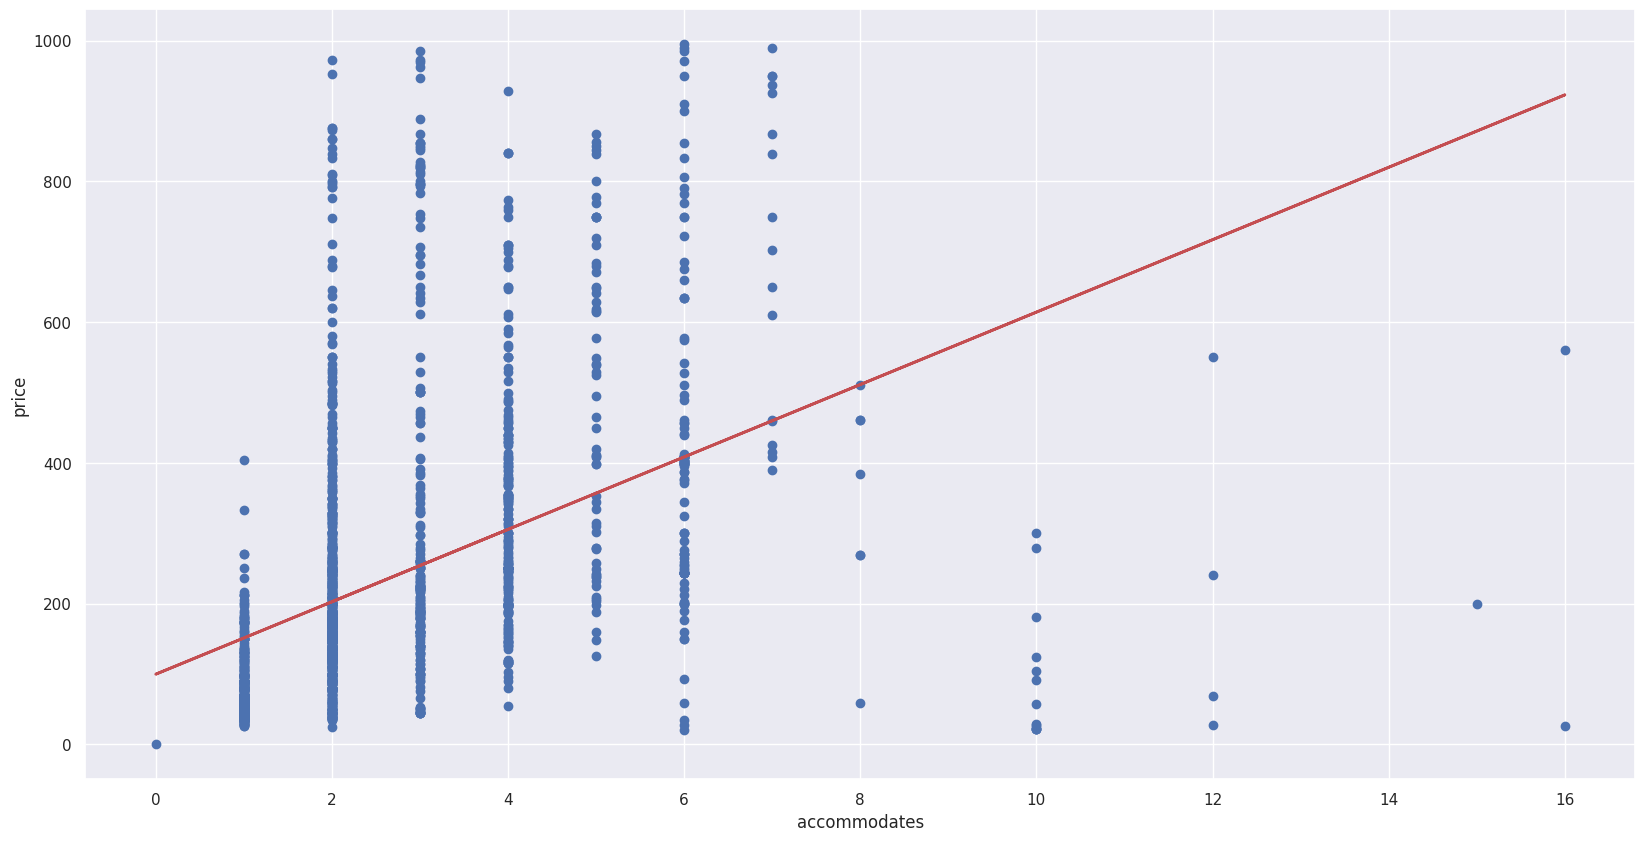

In [1855]:
#Try to predict price using accommodates
accommodatesDF = pd.DataFrame(airDF["accommodates"])
price_test, price_train_pred, price_test_pred = calcLinRegression(accommodatesDF, priceDF, solidLine= True, xTitle = "accommodates", yTitle = "price")
None

## 1f) accomodates vs price Analaysis

Using linear regression, the explained variance of just ~0.10 to ~0.14 shows that accommodates does not prove to be very useful in being a factor that affects price, and its mean squared error is very high.

---
## 1g) amenities vs price 
We will go through two approaches, one using the amenities in a one hot encoding, and the other using the number of amenities.


#### a) One Hot encoding's approach


In [1856]:
#lets clean amenities first
new_DF = pd.DataFrame(airDF)
testDF = pd.DataFrame(airDF["amenities"]).astype(str)

#Use a set as it prevents duplicate
uniqueNames = set()
for idx in range(0, len(testDF["amenities"])):
  #Test split on first and making data frame for scaling later
  s = testDF["amenities"][idx]
  #Replace the apostrophes
  s = s.replace("'", "")
  #Replace the [ and ]
  s = s.replace("[", "")
  s = s.replace("]", "")
  s = s.replace(", ", ",")
  wordList = s.split(",")
  #Update the string at this index
  testDF["amenities"].iloc[idx] = wordList;

  #Add each word into the set
  for x in wordList:
    uniqueNames.add(x)

#Then create our new pd with our set
amenitiesDF = pd.DataFrame(np.empty((len(testDF), len(uniqueNames))) * np.nan ,columns = list(uniqueNames))
#Loop through the current df 
for idx in range(0, len(testDF["amenities"])):
  words = testDF["amenities"][idx]
  #Loop through each amenity, and then update our adj matrix
  for word in words:
    amenitiesDF[word][idx] = 1

amenitiesDF = amenitiesDF.fillna(0)
amenitiesDF

<ipython-input-1856-a7b4cda529c8>:25: RuntimeWarning: invalid value encountered in multiply
  amenitiesDF = pd.DataFrame(np.empty((len(testDF), len(uniqueNames))) * np.nan ,columns = list(uniqueNames))


,Shared pool,First aid kit,Baby bath,Shared outdoor pool - available all year,Bathtub,open specific hours,Dryer \\u2013\\u00a0In unit,Host greets you,Coffee,Safe,...,Wifi,Air conditioning,Shower gel,Wine glasses,Dishes and silverware,Pets allowed,Crib,Private entrance,Dryer,Gym
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1857]:
# Extract Response and Predictors
y = pd.DataFrame(priceDF)
X = pd.DataFrame(amenitiesDF)
y_train, y_train_pred, y_test, y_test_pred = calcLinRegressionCategorical(X,y,0.2)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5921271205013918
Mean Squared Error (MSE) 	: 17663.215563225483
Root Mean Squared Error (RMSE) 	: 132.9030306773532

Accuracy of Model        	Test Dataset
Explained Variance (R^2) 	: 0.5182512128525162
Mean Squared Error (MSE) 	: 17741.78376757983
Root Mean Squared Error (RMSE) 	: 133.1982874048305



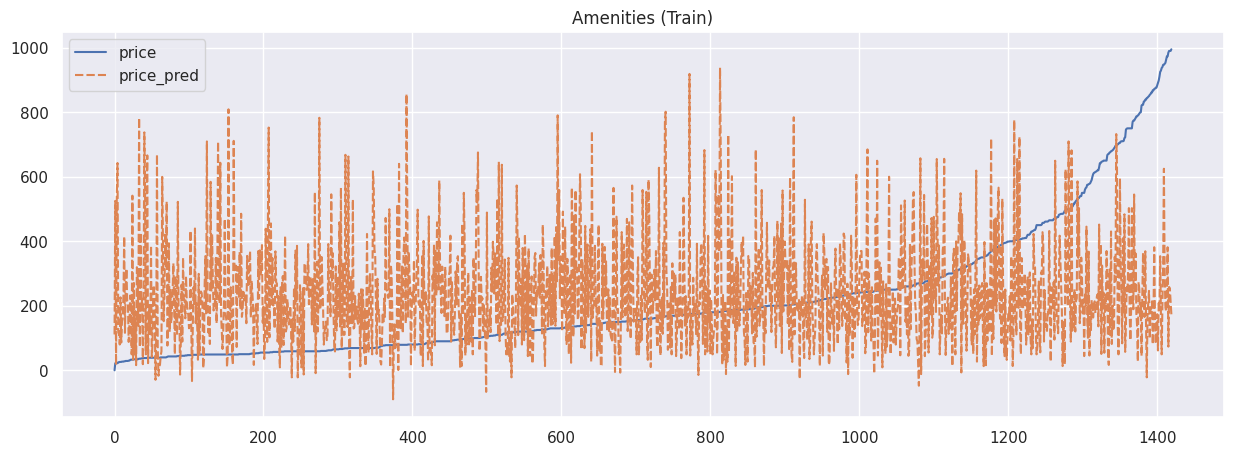

In [1858]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_train, y_train_pred, title="Amenities (Train)")

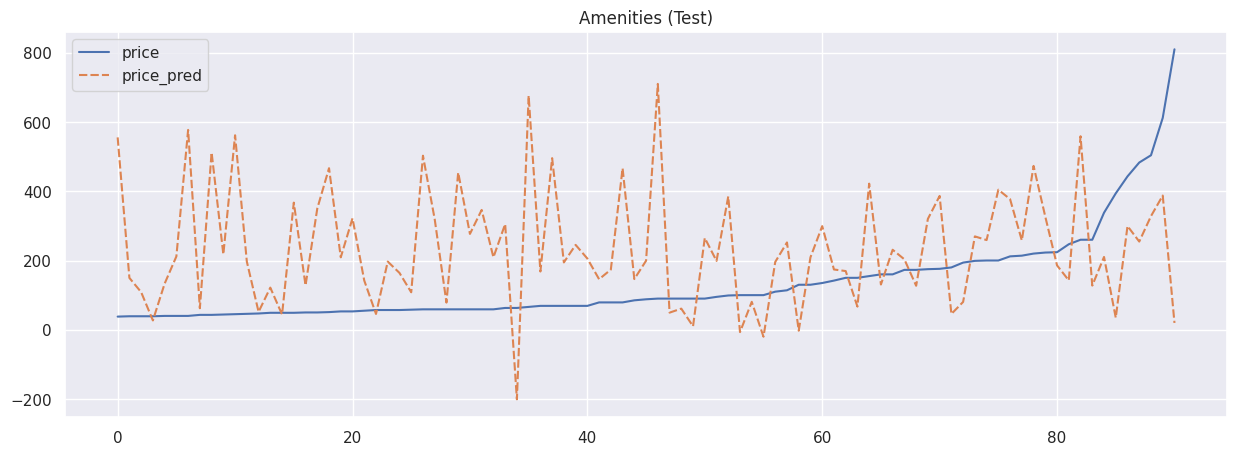

In [1859]:
fg = plt.figure(figsize=(15, 5))
plot_actual_vs_pred(y_test, y_test_pred, title="Amenities (Test)")

## 1g) amenities vs price Analysis


*   Both models have an explained variance 
*   List item




### b) Number of amenities' approach


Regression intercept 		: b =  78.89802801581092
Regression coefficients 	: a =  [6.46933791]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.09924772383211611
Mean Squared Error (MSE)	: 48554.240827069254
Root Mean Squared Error (RMSE) 	: 220.3502684978379
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.058560978749715775
Mean Squared Error (MSE)	: 48380.61273260071
Root Mean Squared Error (RMSE) 	: 219.95593361535103



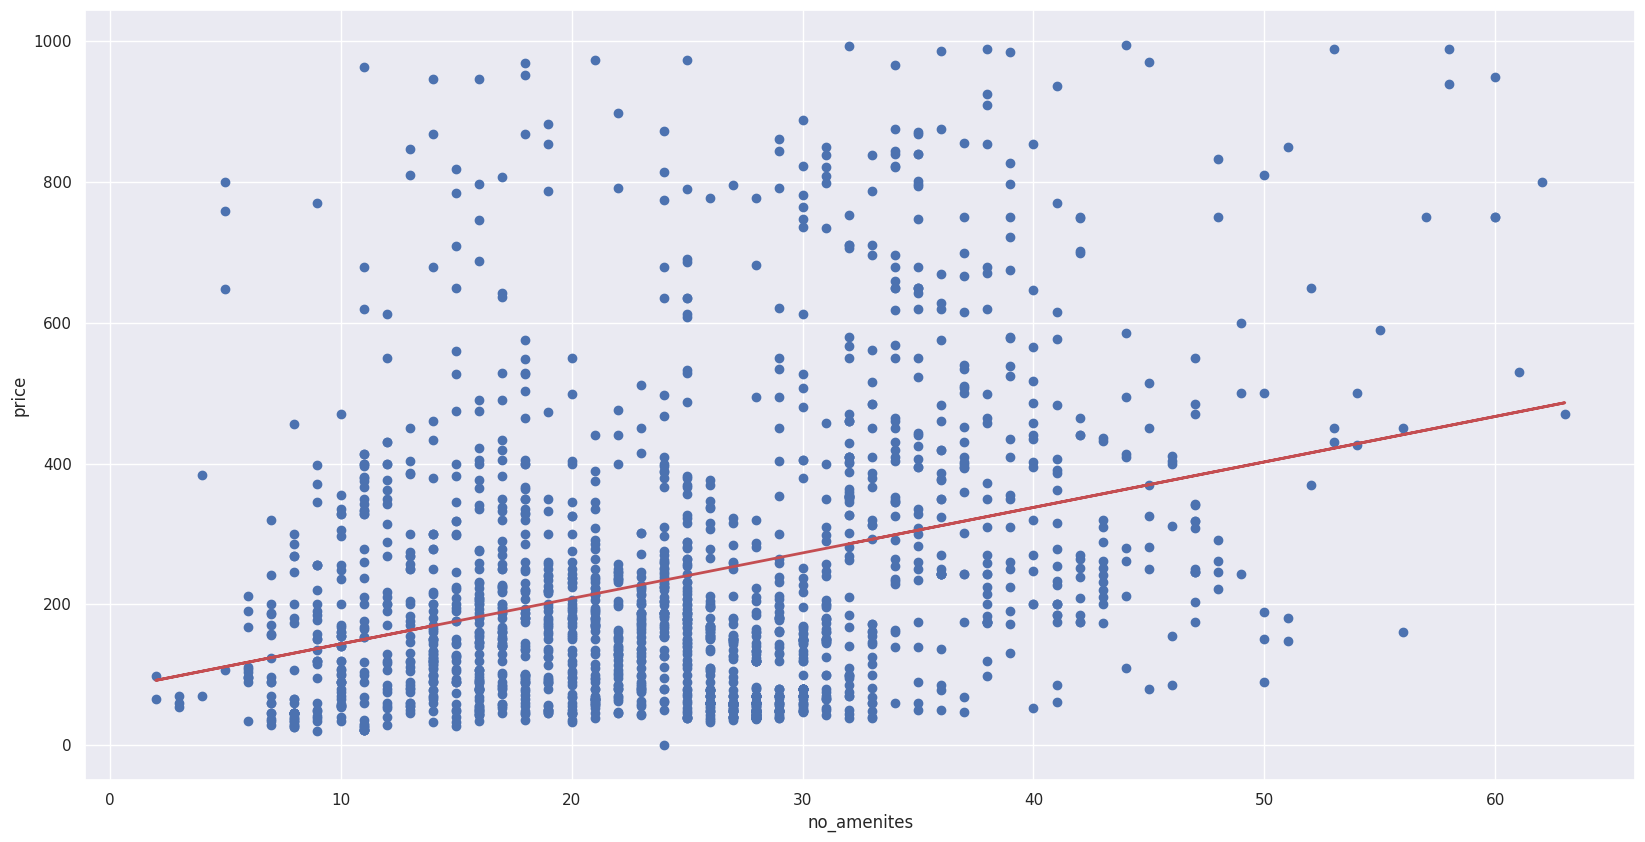

In [1860]:
#Try to predict price using no_amenities
noAmenitiesDF = pd.DataFrame(airDF["no_amenities"])
price_test, price_train_pred, price_test_pred = calcLinRegression(noAmenitiesDF, priceDF, solidLine= True, xTitle = "no_amenites", yTitle = "price")
None

---
## 1g) number_of_reviews vs price 

Regression intercept 		: b =  245.35542594333168
Regression coefficients 	: a =  [-0.86343471]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.015628252155222233
Mean Squared Error (MSE)	: 54271.31178986291
Root Mean Squared Error (RMSE) 	: 232.96203937522293
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.015444888407685209
Mean Squared Error (MSE)	: 54537.70636841235
Root Mean Squared Error (RMSE) 	: 233.53309480331123



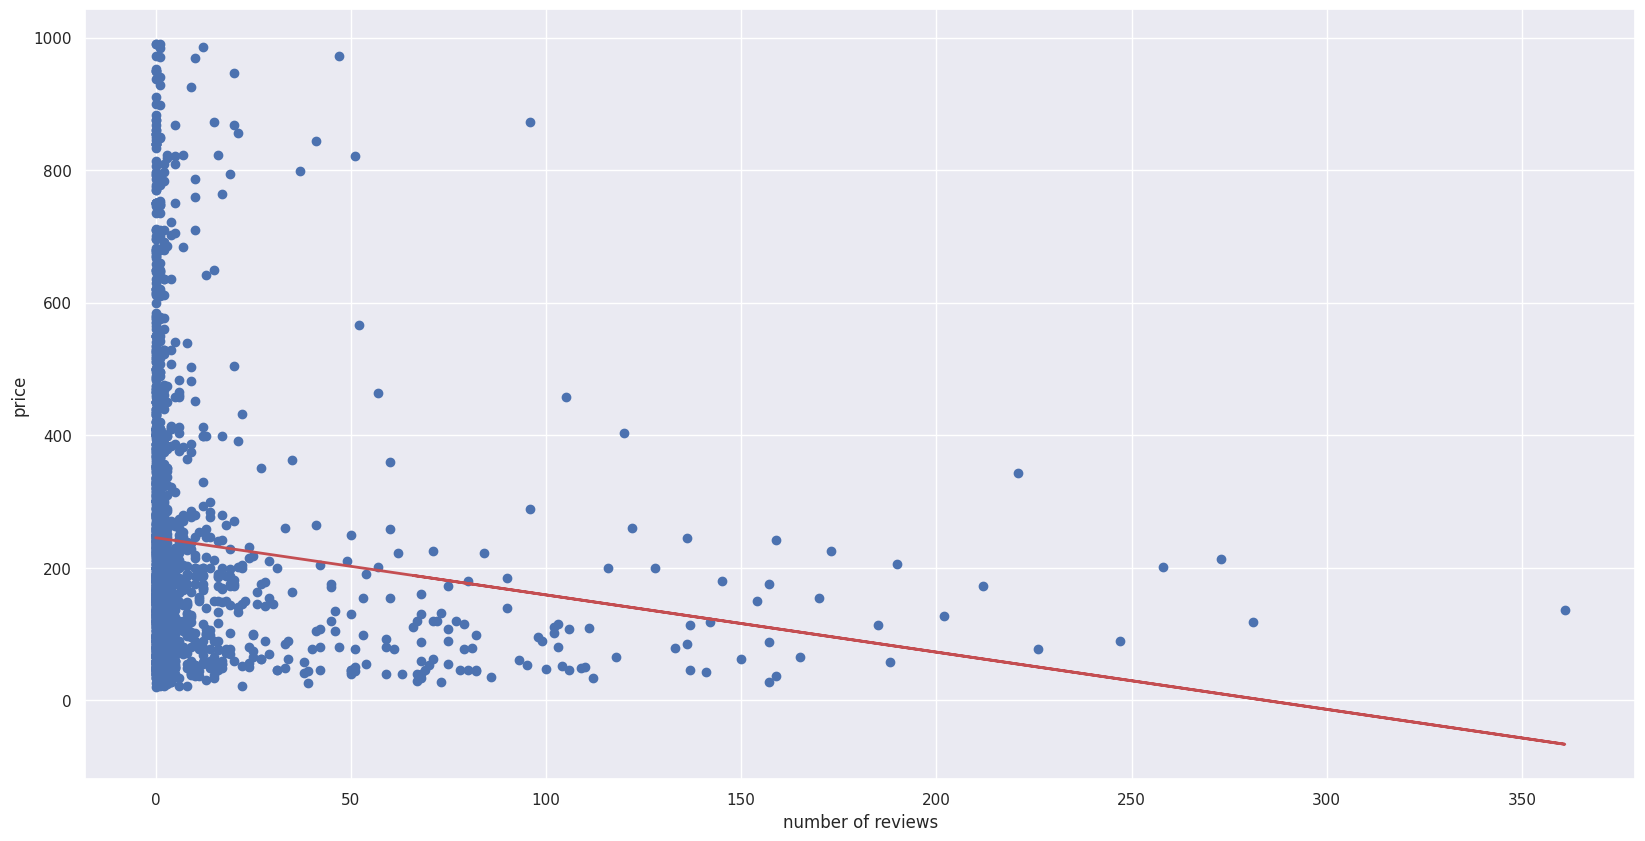

In [1861]:
#Try to predict price using number_of_reviews
reviewsDF = pd.DataFrame(airDF["number_of_reviews"])
price_test, price_train_pred, price_test_pred = calcLinRegression(reviewsDF, priceDF, solidLine= True, xTitle = "number of reviews", yTitle = "price")
None

---